In [1]:
import PID
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
%matplotlib inline

## define PID weights

PID controller minimizes error by adjusting a control variable (eg power supplied) to a new value determined by a weighted sum of present (P), past (I), and future (D) error values.

In [2]:
P = 1.2 # weight current errors more
I = 1
D = 0.0 # ignore future potential errors 

In [3]:
L = 50 # number of iterations

In [11]:
pid = PID.PID(P, I, D)

pid.SetPoint=0.0
pid.setSampleTime(0.01)

END = L
feedback = 0

feedback_list = []
time_list = []
setpoint_list = []

for i in range(1, END):
    pid.update(feedback)
    output = pid.output
    if pid.SetPoint > 0:
        feedback += (output - (1/i))
    if i>9:
        pid.SetPoint = 1
    time.sleep(0.02)

    feedback_list.append(feedback)
    setpoint_list.append(pid.SetPoint)
    time_list.append(i)

time_sm = np.array(time_list)
time_smooth = np.linspace(time_sm.min(), time_sm.max(), 300)
feedback_smooth = make_interp_spline(time_list, feedback_list)(time_smooth)



## how quickly does it converge?

green is desired value; blue is actual

(0.5, 1.5)

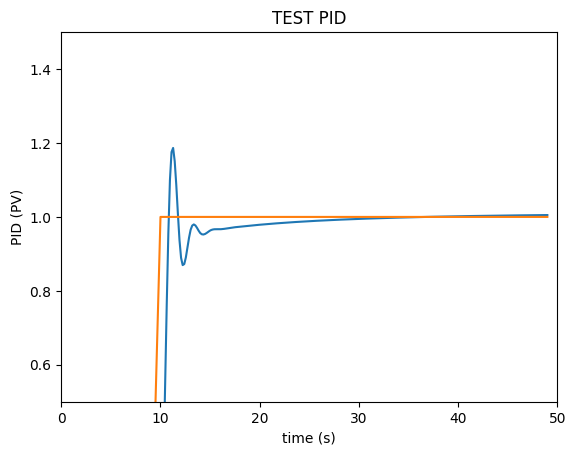

In [12]:
plt.plot(time_smooth, feedback_smooth)
plt.plot(time_list, setpoint_list)
plt.xlim((0, L))
plt.ylim((min(feedback_list)-0.5, max(feedback_list)+0.5))
plt.xlabel('time (s)')
plt.ylabel('PID (PV)')
plt.title('TEST PID')

plt.ylim((1-0.5, 1+0.5))